#### 最常见的基于协整配对交易流程实现

1. 策略构建

基于2020年的分钟数据构建策略。

1.1 数据处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

沪深300股指期货分钟价格序列处理

In [2]:
# 2020年IF（沪深300）一分钟数据
IF_df = pd.read_excel('Data/IF2020年1分钟.xlsx')
IF_df.head()

,代码,名称,日期,开盘价(元),最高价(元),最低价(元),收盘价(元),结算价,成交额(百万),成交量,持仓量
0,IF.CFE,沪深300期货,2020-04-24 10:52:00,3776.8,3779.4,3776.4,3778.0,0.0,199.48,176.0,67853.0
1,IF.CFE,沪深300期货,2020-04-24 10:53:00,3778.2,3778.8,3776.8,3778.4,0.0,255.03,225.0,67742.0
2,IF.CFE,沪深300期货,2020-04-24 10:54:00,3778.0,3778.4,3776.2,3776.4,0.0,202.84,179.0,67730.0
3,IF.CFE,沪深300期货,2020-04-24 10:55:00,3776.8,3779.0,3776.6,3779.0,0.0,278.83,246.0,67681.0
4,IF.CFE,沪深300期货,2020-04-24 10:56:00,3779.0,3781.2,3778.2,3780.6,0.0,521.67,460.0,67570.0


In [3]:
# 缺失值统计
IF_df.isna().sum()

代码         1
名称         2
日期         2
开盘价(元)     2
最高价(元)     2
最低价(元)     2
收盘价(元)     2
结算价        2
成交额(百万)    2
成交量        2
持仓量        2
dtype: int64

In [4]:
# 缺失值较少，直接drop
IF_df = IF_df.dropna()

In [5]:
# 计算每分钟均价
IF_df['日期'] = pd.to_datetime(IF_df['日期'])
IF_df = IF_df.set_index('日期')
# 由于一般假设股价服从log-normal，故对价格取对数
# 得到的时间序列应为~I(1),log收益序列～I(0)
IF_log_p = np.log(IF_df["收盘价(元)"])

In [6]:
IF_log_p

日期
2020-04-24 10:52:00    8.236950
2020-04-24 10:53:00    8.237056
2020-04-24 10:54:00    8.236526
2020-04-24 10:55:00    8.237215
2020-04-24 10:56:00    8.237638
                         ...   
2020-11-09 11:25:00    8.516793
2020-11-09 11:26:00    8.516793
2020-11-09 11:27:00    8.517033
2020-11-09 11:28:00    8.516913
2020-11-09 11:29:00    8.516353
Name: 收盘价(元), Length: 31402, dtype: float64

上证500股指期货分钟价格序列处理

In [7]:
# 2020年IH（上证500）一分钟数据
IH_df = pd.read_excel('Data/IH2020年1分钟.xlsx')
IH_df.head()

,代码,名称,日期,开盘价(元),最高价(元),最低价(元),收盘价(元),结算价,成交额(百万),成交量,持仓量
0,IH.CFE,上证50期货,2020-04-24 09:59:00,2749.4,2749.4,2747.0,2747.2,0.0,94.81,115.0,26284.0
1,IH.CFE,上证50期货,2020-04-24 10:00:00,2746.8,2747.8,2745.6,2747.0,0.0,93.12,113.0,26264.0
2,IH.CFE,上证50期货,2020-04-24 10:01:00,2747.0,2748.4,2747.0,2747.8,0.0,59.35,72.0,26247.0
3,IH.CFE,上证50期货,2020-04-24 10:02:00,2747.6,2748.6,2746.4,2747.6,0.0,65.94,80.0,26231.0
4,IH.CFE,上证50期货,2020-04-24 10:03:00,2747.4,2748.0,2746.6,2746.8,0.0,55.22,67.0,26207.0


In [8]:
# 缺失值统计
IH_df.isna().sum()

代码         1
名称         2
日期         2
开盘价(元)     2
最高价(元)     2
最低价(元)     2
收盘价(元)     2
结算价        2
成交额(百万)    2
成交量        2
持仓量        2
dtype: int64

In [9]:
# 缺失值较少，直接drop
IH_df = IH_df.dropna()

In [10]:
# 计算每分钟均价
IH_df['日期'] = pd.to_datetime(IH_df['日期'])
IH_df = IH_df.set_index('日期')
# 由于一般假设股价服从log-normal，故对价格取对数
# 得到的时间序列应为~I(1),log收益序列～I(0)
IH_log_p = np.log(IH_df["收盘价(元)"])

In [11]:
# 合并数据集
IF_log_p.name = "IF_log_p"
IH_log_p.name = "IH_log_p"
train_data = pd.concat([IF_log_p,IH_log_p],axis=1).dropna() # some entries may not share identical label
train_data

,IF_log_p,IH_log_p
日期,,
2020-04-24 10:52:00,8.236950,7.921245
2020-04-24 10:53:00,8.237056,7.921100
2020-04-24 10:54:00,8.236526,7.921173
2020-04-24 10:55:00,8.237215,7.921463
2020-04-24 10:56:00,8.237638,7.921753
...,...,...
2020-11-09 11:25:00,8.516793,8.138156
2020-11-09 11:26:00,8.516793,8.138389
2020-11-09 11:27:00,8.517033,8.138798


1.2 协整关系

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


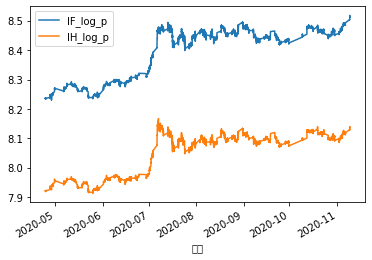

In [12]:
# 画图观察两个时间序列的关系
train_data.plot()

1.2.1 分别对两个序列进行ADF Test。

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adfresult1 = adfuller(train_data["IH_log_p"],maxlag=2,regression='ct') # constant or linear trend
adfresult1[1] #pavalue

0.6503111844911242

In [15]:
adfresult2 = adfuller(train_data["IF_log_p"],maxlag=2,regression='ct')
adfresult2[1]

0.7502835327689898

拒绝两个序列含有unit root。

1.2.2 用Cointegrated Augmented Dickey Fuller Test检测协整关系

In [16]:
# step1: 用回归找出线性关系
from sklearn.linear_model import LinearRegression 
lm_model = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lm_model.fit(train_data["IF_log_p"].values.reshape(-1,1), train_data["IH_log_p"].values) 
print('pamameters: %.7f, %.7f' %(lm_model.intercept_, lm_model.coef_))
yfit = lm_model.coef_ * train_data['IF_log_p'] + lm_model.intercept_
y_residual = train_data['IH_log_p'] - yfit

pamameters: 1.0702376, 0.8314371


In [17]:
# step2: 用ADF Test检测余项
adfuller(y_residual, 1)           # lag = 1

(-3.005934124536253,
 0.03434393166717476,
 1,
 31303,
 {'1%': -3.4305589204333, '5%': -2.861632337325479, '10%': -2.566819148316002},
 -411095.00017978053)

无法拒绝存在协整关系的假设。

1.3 构建静态多空组合

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


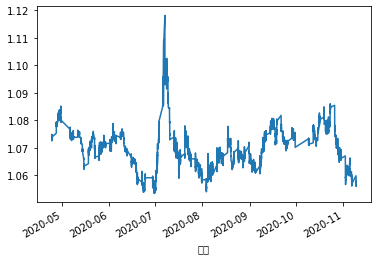

In [18]:
# 使用回归结果，多头IH 1 unit，空头IF lm_model.coef_ unit。
spread = train_data['IH_log_p'] - lm_model.coef_ * train_data['IF_log_p']
spread.name = "spread"
spread.to_csv("CADF_spread.csv")
spread.plot()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


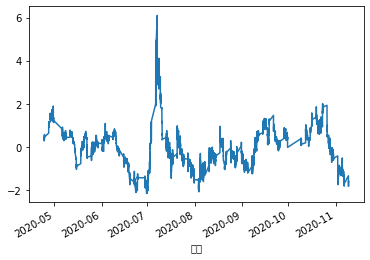

In [19]:
# 用z-score代替spread，会更加清晰：
z_spread = (spread-spread.mean())/spread.std()
z_spread.plot()

设计套利策略的核心是确定头寸（position）以及确定进入头寸的时机。

（1）设计头寸的方法分为两种，一种是像上面一样考虑长期的协整关系，从而设计静态对冲系数（static hedging ratio）；另一种方法是考虑随时间变化的协整关系（time-varying cointegration），从而设计动态对冲系数（dynamic hedging ratio）。

（2）确定进入时机的思路一般是确定一个（或多个）价差偏离的阀值（band design），每当价差达到阀值就进入相应的头寸。具体的方法也有两种，第一种是现对价差的分布进行建模，从而根据回归中值（mean reverting）的概率进行设计。另一种是用非参数模型，在最大化收益的维度上进行设计。

上面已经通过CADF得到了基于长期协整关系的对冲系数。最简单的假设是spread服从某一高斯分布。

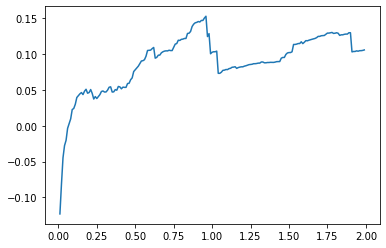

In [23]:
# 先考虑non-parametric的方式
def calculate_profit(spread,threshold):
    # 计算每期价差的变化，也即log return
    log_ret = spread.diff().values
    spread_score = (spread-spread.mean())/spread.std()
    spread_score = spread_score.values
    # 一开始空仓，只持有现金
    # 当价差大于正threshold的时候，持有负的头寸
    # 当价差小于负threshold的时候，持有正的头寸
    # 其余时间不调整头寸
    portfolio_return = []
    now_pos = 0
    for i in range(1,len(spread_score)):
        if spread_score[i] > threshold:
            now_pos = -1
        if spread_score[i] < -threshold:
            now_pos = 1
        portfolio_return.append(log_ret[i]*now_pos)
        
    total_ret = np.sum(portfolio_return)
    IR = total_ret/np.std(portfolio_return)
        
    return total_ret,IR, portfolio_return

profit_list = []
IR_list = []
threshold_list = [0.01* n for n in range(1,200)]
for threshold in threshold_list:
    #print(threshold)
    profit = calculate_profit(spread,threshold)
    profit_list.append(profit[0])
    IR_list.append(profit[1])
    #print(threshold)
    #print(profit[0])
plt.plot(threshold_list,profit_list)
# bellow is the plot of profit given different threshold

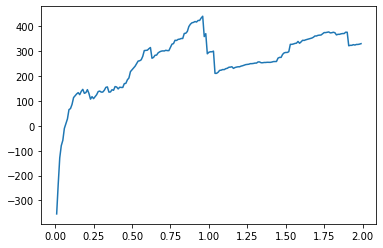

In [24]:
# bellow is the plot of information ratio given different threshold
plt.plot(threshold_list,IR_list)

In [25]:
print(threshold_list[np.argmax(profit_list)])
print(threshold_list[np.argmax(IR_list)])
# 最佳值都在0.96取到

0.96
0.96


profit:
0.15274621564003077
IF Ratio:
440.24922895710677


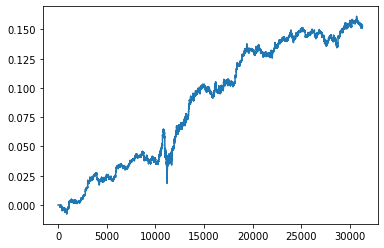

In [30]:
result = calculate_profit(spread,0.96)
print("profit:")
print(result[0])
print("IF Ratio:")
print(result[1]) # that ratio is not annualized
profit = pd.Series(result[2])
plt.plot(profit.cumsum()) # 收益序列

2. 策略测试

In [44]:
#读入测试数据
test_data = pd.read_excel('Data/IFIH近期分钟.xlsx')
test_data = test_data[test_data["日期"]>pd.Timestamp("2020-11-09 11:29:00")]
test_data["IF_log_p"] = np.log(test_data["收盘价(元)"])
test_data["IH_log_p"] = np.log(test_data["收盘价(元).1"])
test_data["日期"] = pd.to_datetime(test_data["日期"])
test_data = test_data.set_index("日期")
test_data.head()

,收盘价(元),日期.1,收盘价(元).1,IF_log_p,IH_log_p
日期,,,,,
2020-11-09 13:00:00,4995.0,2020-11-09 13:00:00,3423.8,8.516193,8.138506
2020-11-09 13:01:00,4993.4,2020-11-09 13:01:00,3424.0,8.515872,8.138565
2020-11-09 13:02:00,4997.6,2020-11-09 13:02:00,3426.4,8.516713,8.139265
2020-11-09 13:03:00,4998.4,2020-11-09 13:03:00,3427.8,8.516873,8.139674
2020-11-09 13:04:00,4998.6,2020-11-09 13:04:00,3426.4,8.516913,8.139265


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


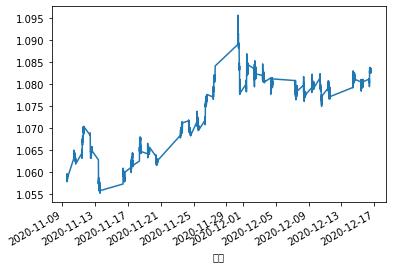

In [45]:
# calculate and plot the test spread
test_spread = test_data['IH_log_p'] - lm_model.coef_ * test_data['IF_log_p']
test_spread.name = "test_spread"
test_spread.to_csv("CADF_test_spread.csv")
test_spread.plot()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


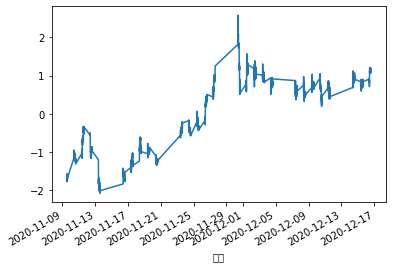

In [48]:
# z-score
((test_spread-test_spread.mean())/test_spread.std()).plot()
# the mean-reverting process seems to take much longer time

profit:
0.021481582046592784
IF Ratio:
66.87374919517984


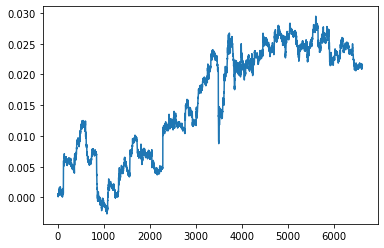

In [46]:
test_result = calculate_profit(test_spread,0.96)
print("profit:")
print(test_result[0])
print("IF Ratio:")
print(test_result[1]) # that ratio is not annualized
test_profit = pd.Series(test_result[2])
plt.plot(test_profit.cumsum()) # 收益序列

In [49]:
# 记录结果
profit.to_csv("baseline_train_profit.csv")
test_profit.to_csv("baseline_test_profit.csv")

3. 总结讨论

显然，训练集的结果在测试集上表现得不太好，可能是因为所用的模型太简单（静态协整+white noise）。改进方法：
（1）考虑更复杂的模型
（2）考虑rolling window。接下来主要先考虑用更复杂的模型来拟合价差序列。